## Import Libraries and Set Display Options

This cell imports the necessary libraries and sets display options to ensure that we can view all columns and have a comfortable display width. These libraries are essential for data manipulation and visualization.


In [1]:
# Importing the necessary libraries for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/andresca94/pursuit_assessment


## Define File Paths and Load the CSV Files

In this cell, we define the relative file paths for the provided CSV files (contacts, entities/places, and techstacks). We then load these files into Pandas DataFrames. Note that we are excluding the customer mapping CSVs at this stage.


In [6]:
# Define file paths for the provided CSV files
contacts_path = 'data/contacts.csv'
entities_path = 'data/places.csv'        # sometimes labeled entities.csv; adjust based on your file
techstacks_path = 'data/techstacks.csv'

# Load the CSV files into DataFrames
try:
    contacts_df = pd.read_csv(contacts_path)
    print("Contacts loaded successfully! Shape:", contacts_df.shape)
except Exception as e:
    print(f"Error loading contacts: {e}")

try:
    entities_df = pd.read_csv(entities_path)
    print("Entities (places) loaded successfully! Shape:", entities_df.shape)
except Exception as e:
    print(f"Error loading entities: {e}")

try:
    techstacks_df = pd.read_csv(techstacks_path)
    print("Techstacks loaded successfully! Shape:", techstacks_df.shape)
except Exception as e:
    print(f"Error loading techstacks: {e}")


Contacts loaded successfully! Shape: (198023, 9)
Entities (places) loaded successfully! Shape: (1000, 12)
Techstacks loaded successfully! Shape: (2300, 3)


## Quick Preview of the DataFrames

This cell displays the first few rows of each DataFrame so we can quickly inspect the structure and content of our data.


In [7]:
# Display the first few rows of each dataset
print("Contacts DataFrame Preview:")
display(contacts_df.head())

print("\nEntities (Places) DataFrame Preview:")
display(entities_df.head())

print("\nTechstacks DataFrame Preview:")
display(techstacks_df.head())


Contacts DataFrame Preview:


,place_id,first_name,last_name,emails,phone,url,title,department,created_at
0,6542a2e8a129cb65b879ffe4,Keith,Barnes,NaN,NaN,https://cityofabbeville.org/parks-and-recreation,Director,Parks and Recreation,Mon Apr 08 2024 22:25:33 GMT-0700 (Pacific Day...
1,6542a2e8a129cb65b879ffec,Nick,Moore,nmoore@abbevillecitysc.com,(864) 366-5832,https://www.abbevillecitysc.com/Directory.aspx...,Chief of Police,Police Department,Tue Dec 19 2023 07:37:52 GMT-0800 (Pacific Sta...
2,6542a2e8a129cb65b879ffec,Mike,Clary,mclary@abbevillecitysc.com,NaN,https://www.abbevillecitysc.com/370/Doing-Busi...,Deputy Administrative Officer,NaN,Tue Dec 19 2023 07:37:58 GMT-0800 (Pacific Sta...
3,6542a2e8a129cb65b879ffec,Emily,Gosnell,egosnell@abbevillecitysc.com,(864) 366-1791,https://www.abbevillecitysc.com/Directory.aspx...,Staff Accountant,Administration,Tue Dec 19 2023 07:38:06 GMT-0800 (Pacific Sta...
4,6542a2e8a129cb65b879ffec,Sydney,Wells,swells@abbevillecitysc.com,NaN,https://www.abbevillecitysc.com/directory.aspx...,Events and Opera House Technical Coordinator,Administration,Tue Dec 19 2023 07:38:06 GMT-0800 (Pacific Sta...



Entities (Places) DataFrame Preview:


,place_id,state_abbr,lat,long,pop_estimate_2022,place_fips,sum_lev,url,lsadc,display_name,parent_id,address
0,6542a2e8a129cb65b879ffe4,AL,31.564724,-85.259123,2358.0,124.0,160,https://cityofabbeville.org,25.0,City of Abbeville,65b98a2af5107303ca83c3f7,"101 E Washington St, Abbeville, AL 36310, USA"
1,6542a2e8a129cb65b879ffec,SC,34.178544,-82.377687,4874.0,100.0,160,http://www.abbevillecitysc.com/,25.0,City of Abbeville,65a603fac769fa16f6595c6a,"Abbeville, SC 29620, USA"
2,6542a2e8a129cb65b879fff2,LA,29.975395,-92.127157,11186.0,100.0,160,https://cityofabbeville.net/,25.0,City of Abbeville,65a603f7c769fa16f6593132,"101 N State St, Abbeville, LA 70510, USA"
3,6542a2e8a129cb65b87a0009,MD,39.515856,-76.170180,16254.0,125.0,160,https://www.aberdeenmd.gov/,25.0,City of Aberdeen,65a603f7c769fa16f65934fe,"60 N Parke St A, Aberdeen, MD 21001, USA"
4,6542a2e8a129cb65b87a000e,WA,46.975205,-123.811373,17013.0,100.0,160,https://www.aberdeenwa.gov/,25.0,City of Aberdeen,65a603fac769fa16f659684f,"200 E Market St, Aberdeen, WA 98520, USA"



Techstacks DataFrame Preview:


,name,place_id,type
0,Xpress Pay,6542a2e8a129cb65b879ffe4,payment
1,CivicPlus,6542a2e8a129cb65b879ffec,cms
2,iWorq,6542a2e8a129cb65b879fff2,permitting
3,WordPress,6542a2e8a129cb65b879fff2,cms
4,Google Forms,6542a2e8a129cb65b879fff2,forms


## Get DataFrame Information and Summary Statistics

This cell prints detailed information about each DataFrame (such as column names, data types, and missing values) as well as descriptive statistics. This is essential for understanding data quality and preparing for cleaning and modeling.


In [8]:
# Print DataFrame info to check data types and missing values
print("Contacts DataFrame Info:")
contacts_df.info()

print("\nEntities DataFrame Info:")
entities_df.info()

print("\nTechstacks DataFrame Info:")
techstacks_df.info()

# Show descriptive statistics for numerical columns (and object columns, if useful)
print("\nContacts Descriptive Statistics:")
display(contacts_df.describe(include='all'))

print("\nEntities Descriptive Statistics:")
display(entities_df.describe(include='all'))

print("\nTechstacks Descriptive Statistics:")
display(techstacks_df.describe(include='all'))


Contacts DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198023 entries, 0 to 198022
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   place_id    198023 non-null  object
 1   first_name  198022 non-null  object
 2   last_name   198020 non-null  object
 3   emails      180771 non-null  object
 4   phone       85933 non-null   object
 5   url         198022 non-null  object
 6   title       167293 non-null  object
 7   department  171268 non-null  object
 8   created_at  198023 non-null  object
dtypes: object(9)
memory usage: 13.6+ MB

Entities DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   place_id           1000 non-null   object 
 1   state_abbr         1000 non-null   object 
 2   lat                985 non-null    float64
 

,place_id,first_name,last_name,emails,phone,url,title,department,created_at
count,198023,198022,198020,180771,85933,198022,167293,171268,198023
unique,1000,19740,49703,169843,59832,82466,38911,42663,51863
top,65a603f5c769fa16f659151f,John,Smith,webadmin@allentownpa.gov,(518) 434-2489,https://www.florenceco.org/offices/elected/sol...,Council Member,City Officials,Tue Dec 05 2023 08:45:15 GMT-0800 (Pacific Sta...
freq,5364,2946,2037,51,155,340,9053,7391,344



Entities Descriptive Statistics:


,place_id,state_abbr,lat,long,pop_estimate_2022,place_fips,sum_lev,url,lsadc,display_name,parent_id,address
count,1000,1000,985.000000,985.000000,9.780000e+02,683.000000,1000.000000,985,976.000000,1000,915,864
unique,1000,45,NaN,NaN,NaN,NaN,NaN,977,NaN,959,302,860
top,65a603f5c769fa16f659165c,AL,NaN,NaN,NaN,NaN,NaN,http://www.townofgordo.org,NaN,City of Albany,6542a2e8a129cb65b87a01bd,"1003 US-52, Moncks Corner, SC 29461, USA"
freq,1,290,NaN,NaN,NaN,NaN,NaN,3,NaN,4,127,2
mean,NaN,NaN,36.885598,-90.892066,2.785314e+05,26592.346999,227.990000,NaN,18.887295,NaN,NaN,NaN
std,NaN,NaN,7.934170,20.309365,1.915734e+06,25965.433950,279.456178,NaN,14.248332,NaN,NaN,NaN
min,NaN,NaN,0.000000,-176.598067,1.200000e+01,1.000000,40.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,33.321830,-91.738324,4.335750e+03,1715.000000,50.000000,NaN,6.000000,NaN,NaN,NaN
50%,NaN,NaN,34.681059,-86.206999,1.486000e+04,19744.000000,160.000000,NaN,25.000000,NaN,NaN,NaN
75%,NaN,NaN,37.717772,-80.973160,4.589350e+04,47836.000000,160.000000,NaN,25.000000,NaN,NaN,NaN



Techstacks Descriptive Statistics:


,name,place_id,type
count,2300,2300,2300
unique,103,683,18
top,CivicPlus,6542a357a129cb65b87af186,cms
freq,377,13,588


## Check for Missing Values

This cell defines a helper function to report missing values in each DataFrame. Identifying missing values helps us determine where data cleaning or imputation may be required.


In [9]:
def report_missing(df, df_name):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"\nMissing values in {df_name}:")
        print(missing)
    else:
        print(f"\nNo missing values detected in {df_name}.")

report_missing(contacts_df, "Contacts")
report_missing(entities_df, "Entities")
report_missing(techstacks_df, "Techstacks")



Missing values in Contacts:
first_name         1
last_name          3
emails         17252
phone         112090
url                1
title          30730
department     26755
dtype: int64

Missing values in Entities:
lat                   15
long                  15
pop_estimate_2022     22
place_fips           317
url                   15
lsadc                 24
parent_id             85
address              136
dtype: int64

No missing values detected in Techstacks.


## Explore Unique Values and Distributions

This cell examines unique values and distributions in key columns. For example, it inspects contact job titles, email domains, and details in the entities and techstacks DataFrames. Such exploration is vital for understanding the variability and quality of the data.


In [10]:
# Explore unique values in key columns for contacts
if 'title' in contacts_df.columns:
    print("Top 10 Contact Titles:")
    print(contacts_df['title'].value_counts().head(10))

if 'email' in contacts_df.columns:
    contacts_df['email_domain'] = contacts_df['email'].str.split('@').str[-1]
    print("\nTop 10 Email Domains in Contacts:")
    print(contacts_df['email_domain'].value_counts().head(10))

# Explore entities (places) unique values, for example, if there's a 'population' or 'city' column
if 'population' in entities_df.columns:
    print("\nEntities Population Summary:")
    display(entities_df['population'].describe())

if 'city' in entities_df.columns:
    print("\nTop 10 Cities in Entities:")
    print(entities_df['city'].value_counts().head(10))

# Explore technologies - list out unique technologies
if 'technology' in techstacks_df.columns:
    print("\nUnique Technologies in Techstacks:")
    print(techstacks_df['technology'].unique())

Top 10 Contact Titles:
title
Council Member    9053
Mayor             3763
Director          2951
Member            2673
Commissioner      1721
Fire Chief        1494
Board Member      1474
Chair             1316
Teacher           1154
Chairman          1122
Name: count, dtype: int64


## Visualize Data Distributions

This cell provides a visualization of a numeric column. For example, if the entities DataFrame includes a 'population' column, it plots its distribution to help identify trends or potential outliers.


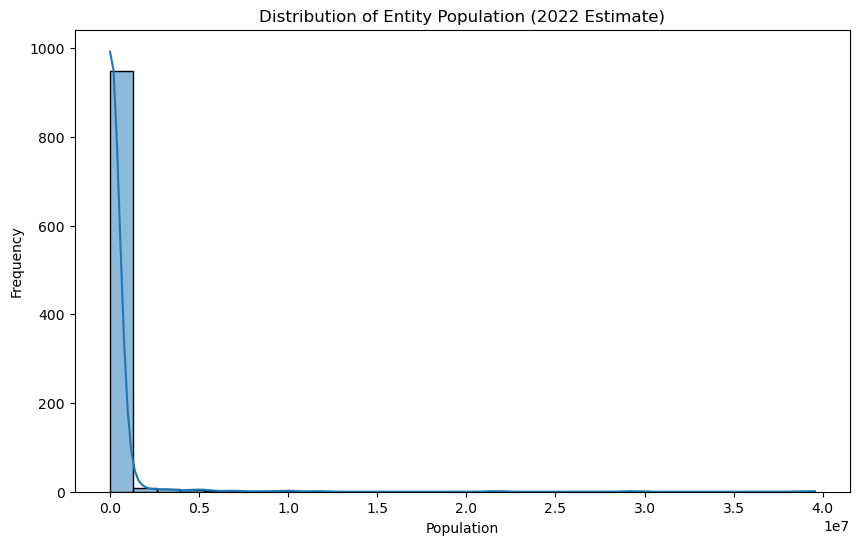

In [13]:
# Plot the distribution of a numeric column, e.g., 'pop_estimate_2022' in entities
if 'pop_estimate_2022' in entities_df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(entities_df['pop_estimate_2022'].dropna(), bins=30, kde=True)
    plt.title("Distribution of Entity Population (2022 Estimate)")
    plt.xlabel("Population")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'pop_estimate_2022' not found in entities_df.")


## Preliminary Exploration of Relationships (Optional)

This cell checks for a common key between the contacts and entities DataFrames (for example, `place_id`) and performs a merge to explore how the data may relate. Adjust the keys as needed based on your dataset.


In [14]:
# Check for common columns to merge on. Here, we assume 'place_id' is common.
print("Contacts Columns:", contacts_df.columns)
print("Entities Columns:", entities_df.columns)

# Perform a merge on 'place_id' if it exists in both DataFrames
if 'place_id' in contacts_df.columns and 'place_id' in entities_df.columns:
    merged_df = contacts_df.merge(entities_df, on='place_id', how='left')
    print("Merged DataFrame (Contacts + Entities) Preview:")
    display(merged_df.head())
else:
    print("No common key found for merging. Adjust the keys as needed.")

Contacts Columns: Index(['place_id', 'first_name', 'last_name', 'emails', 'phone', 'url',
       'title', 'department', 'created_at'],
      dtype='object')
Entities Columns: Index(['place_id', 'state_abbr', 'lat', 'long', 'pop_estimate_2022',
       'place_fips', 'sum_lev', 'url', 'lsadc', 'display_name', 'parent_id',
       'address'],
      dtype='object')
Merged DataFrame (Contacts + Entities) Preview:


,place_id,first_name,last_name,emails,phone,url_x,title,department,created_at,state_abbr,lat,long,pop_estimate_2022,place_fips,sum_lev,url_y,lsadc,display_name,parent_id,address
0,6542a2e8a129cb65b879ffe4,Keith,Barnes,NaN,NaN,https://cityofabbeville.org/parks-and-recreation,Director,Parks and Recreation,Mon Apr 08 2024 22:25:33 GMT-0700 (Pacific Day...,AL,31.564724,-85.259123,2358.0,124.0,160,https://cityofabbeville.org,25.0,City of Abbeville,65b98a2af5107303ca83c3f7,"101 E Washington St, Abbeville, AL 36310, USA"
1,6542a2e8a129cb65b879ffec,Nick,Moore,nmoore@abbevillecitysc.com,(864) 366-5832,https://www.abbevillecitysc.com/Directory.aspx...,Chief of Police,Police Department,Tue Dec 19 2023 07:37:52 GMT-0800 (Pacific Sta...,SC,34.178544,-82.377687,4874.0,100.0,160,http://www.abbevillecitysc.com/,25.0,City of Abbeville,65a603fac769fa16f6595c6a,"Abbeville, SC 29620, USA"
2,6542a2e8a129cb65b879ffec,Mike,Clary,mclary@abbevillecitysc.com,NaN,https://www.abbevillecitysc.com/370/Doing-Busi...,Deputy Administrative Officer,NaN,Tue Dec 19 2023 07:37:58 GMT-0800 (Pacific Sta...,SC,34.178544,-82.377687,4874.0,100.0,160,http://www.abbevillecitysc.com/,25.0,City of Abbeville,65a603fac769fa16f6595c6a,"Abbeville, SC 29620, USA"
3,6542a2e8a129cb65b879ffec,Emily,Gosnell,egosnell@abbevillecitysc.com,(864) 366-1791,https://www.abbevillecitysc.com/Directory.aspx...,Staff Accountant,Administration,Tue Dec 19 2023 07:38:06 GMT-0800 (Pacific Sta...,SC,34.178544,-82.377687,4874.0,100.0,160,http://www.abbevillecitysc.com/,25.0,City of Abbeville,65a603fac769fa16f6595c6a,"Abbeville, SC 29620, USA"
4,6542a2e8a129cb65b879ffec,Sydney,Wells,swells@abbevillecitysc.com,NaN,https://www.abbevillecitysc.com/directory.aspx...,Events and Opera House Technical Coordinator,Administration,Tue Dec 19 2023 07:38:06 GMT-0800 (Pacific Sta...,SC,34.178544,-82.377687,4874.0,100.0,160,http://www.abbevillecitysc.com/,25.0,City of Abbeville,65a603fac769fa16f6595c6a,"Abbeville, SC 29620, USA"
